# Diamond Price Analysis
This notebook provides a comprehensive analysis of the diamond dataset to extract valuable insights and build a predictive model. The analysis includes:
- Analyzing key factors affecting diamond prices
- Building a prediction model to estimate diamond prices
- Clustering diamonds based on their quality and price

Let's begin by loading the dataset and performing exploratory data analysis.

In [8]:
!pip install scikeras

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [27]:
diamonds_df = pd.read_csv('diamonds.csv')
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Exploration (EDA)
We will begin by examining the distributions of key features in the dataset, like `carat`, `cut`, `color`, `clarity`, and `price`. This helps us understand the characteristics of diamonds in this dataset.

In [28]:
df = diamonds_df.copy()
print("Dataset Dimensions:", df.shape)
df.info()
df.describe()

Dataset Dimensions: (50000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


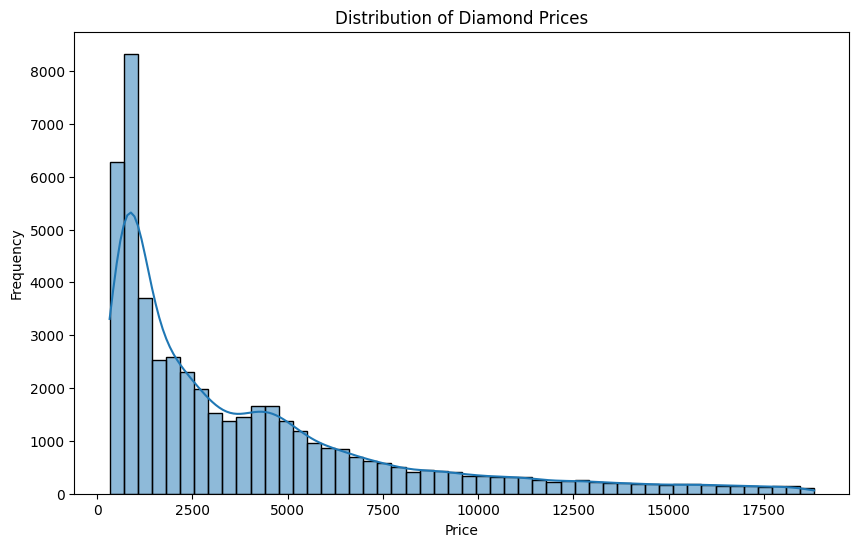

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

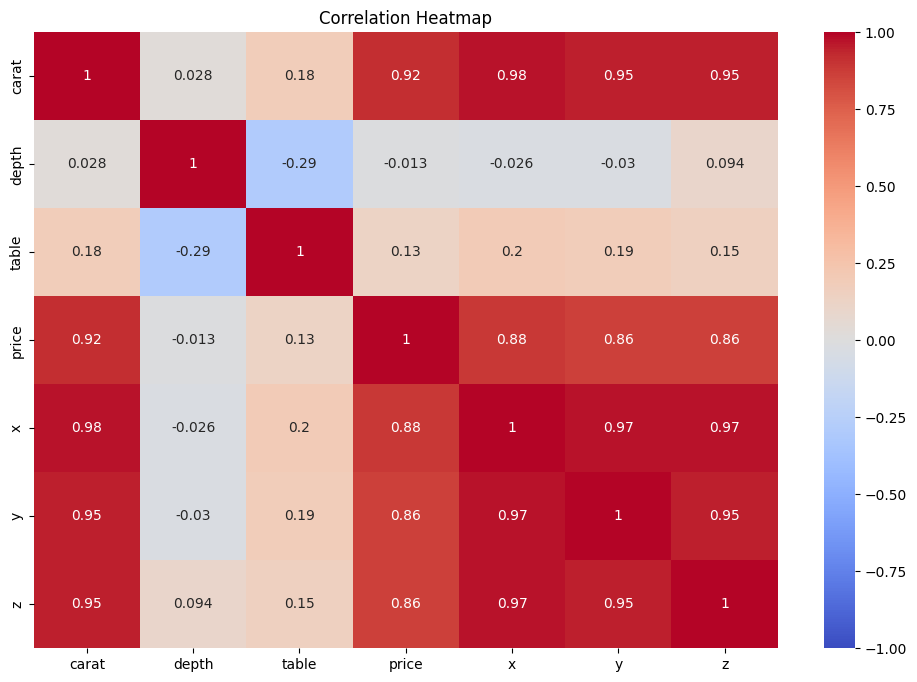

In [18]:
numerical_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

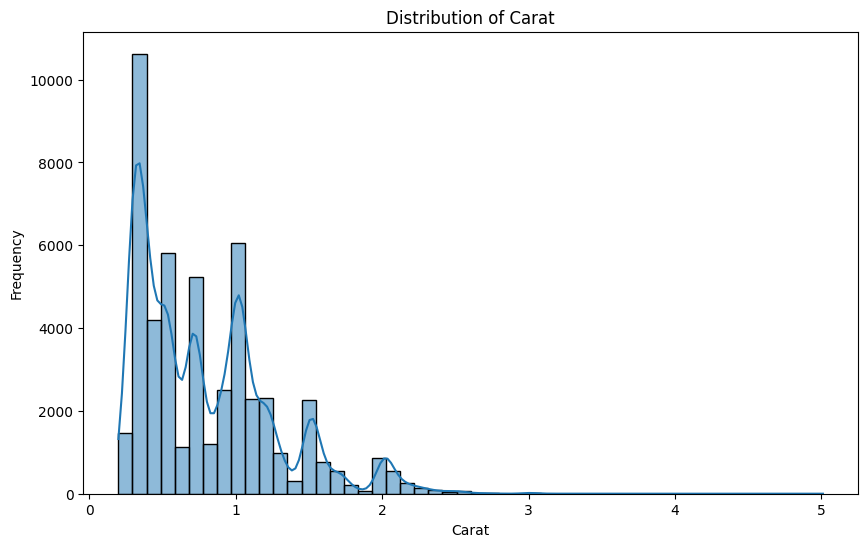

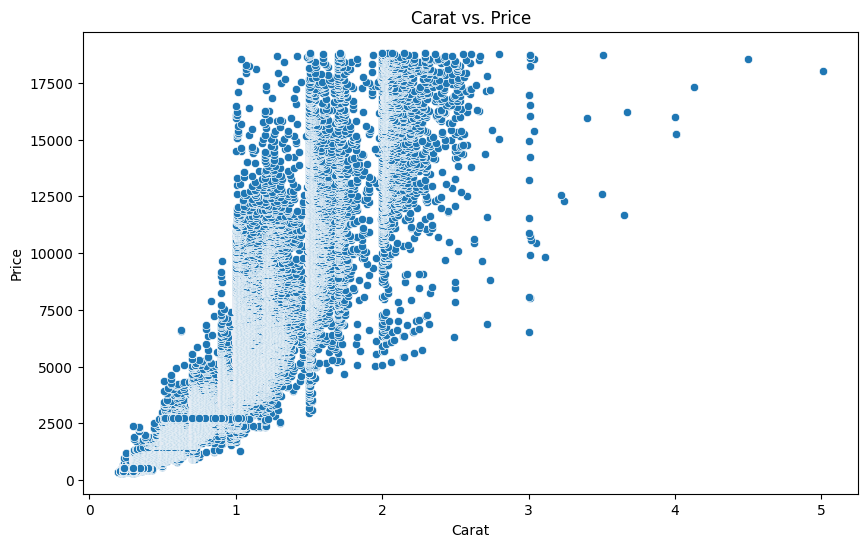

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['carat'], bins=50, kde=True)
plt.title('Distribution of Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

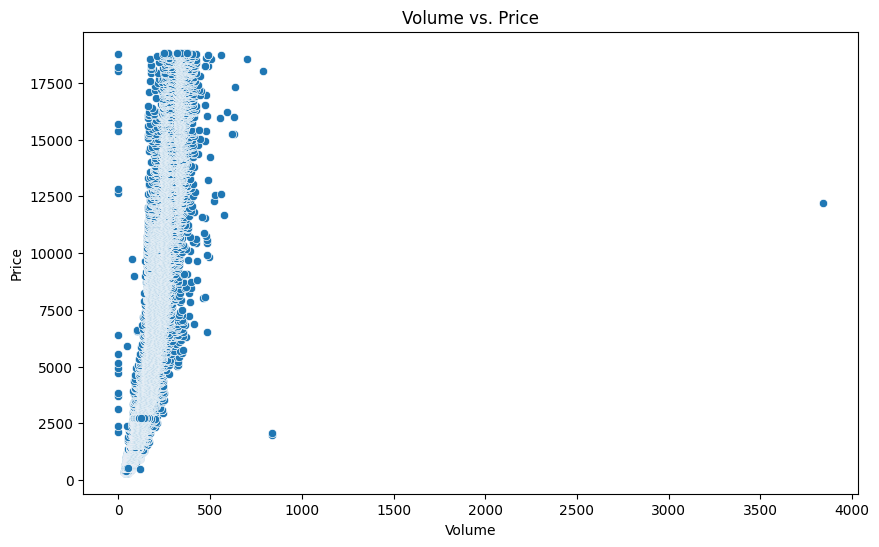

In [20]:
df['volume'] = df['x'] * df['y'] * df['z']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='volume', y='price', data=df)
plt.title('Volume vs. Price')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

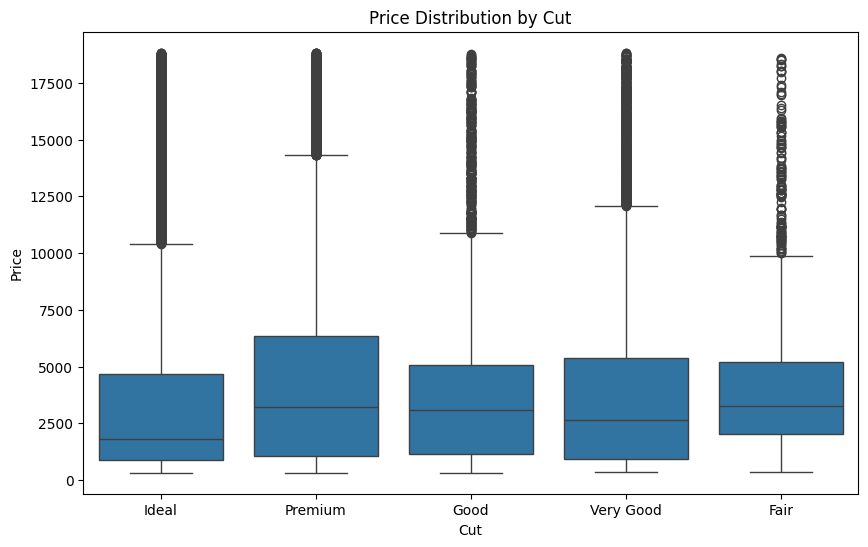

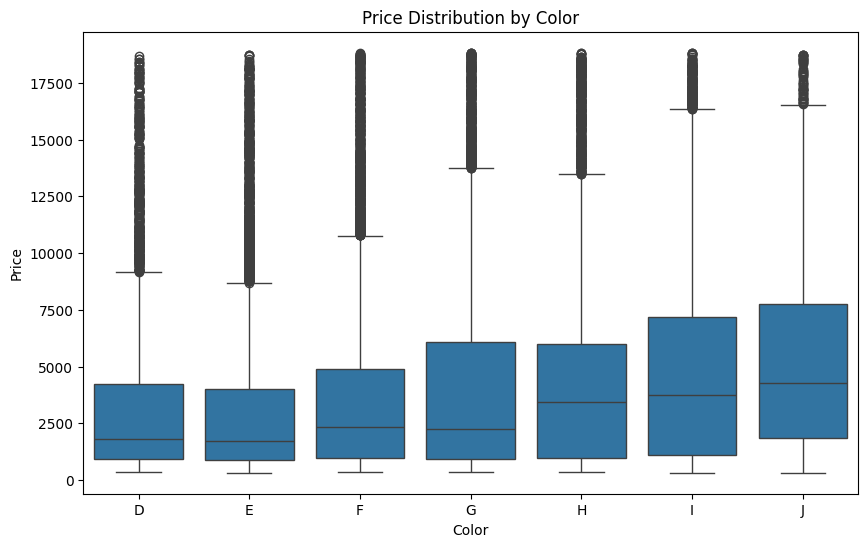

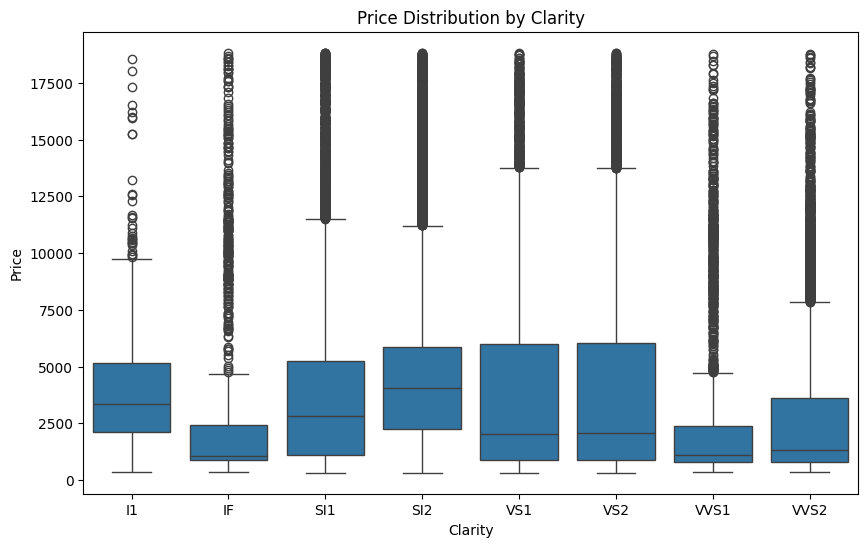

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=df)
plt.title('Price Distribution by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=df, order=sorted(df['color'].unique()))
plt.title('Price Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=df, order=sorted(df['clarity'].unique()))
plt.title('Price Distribution by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()

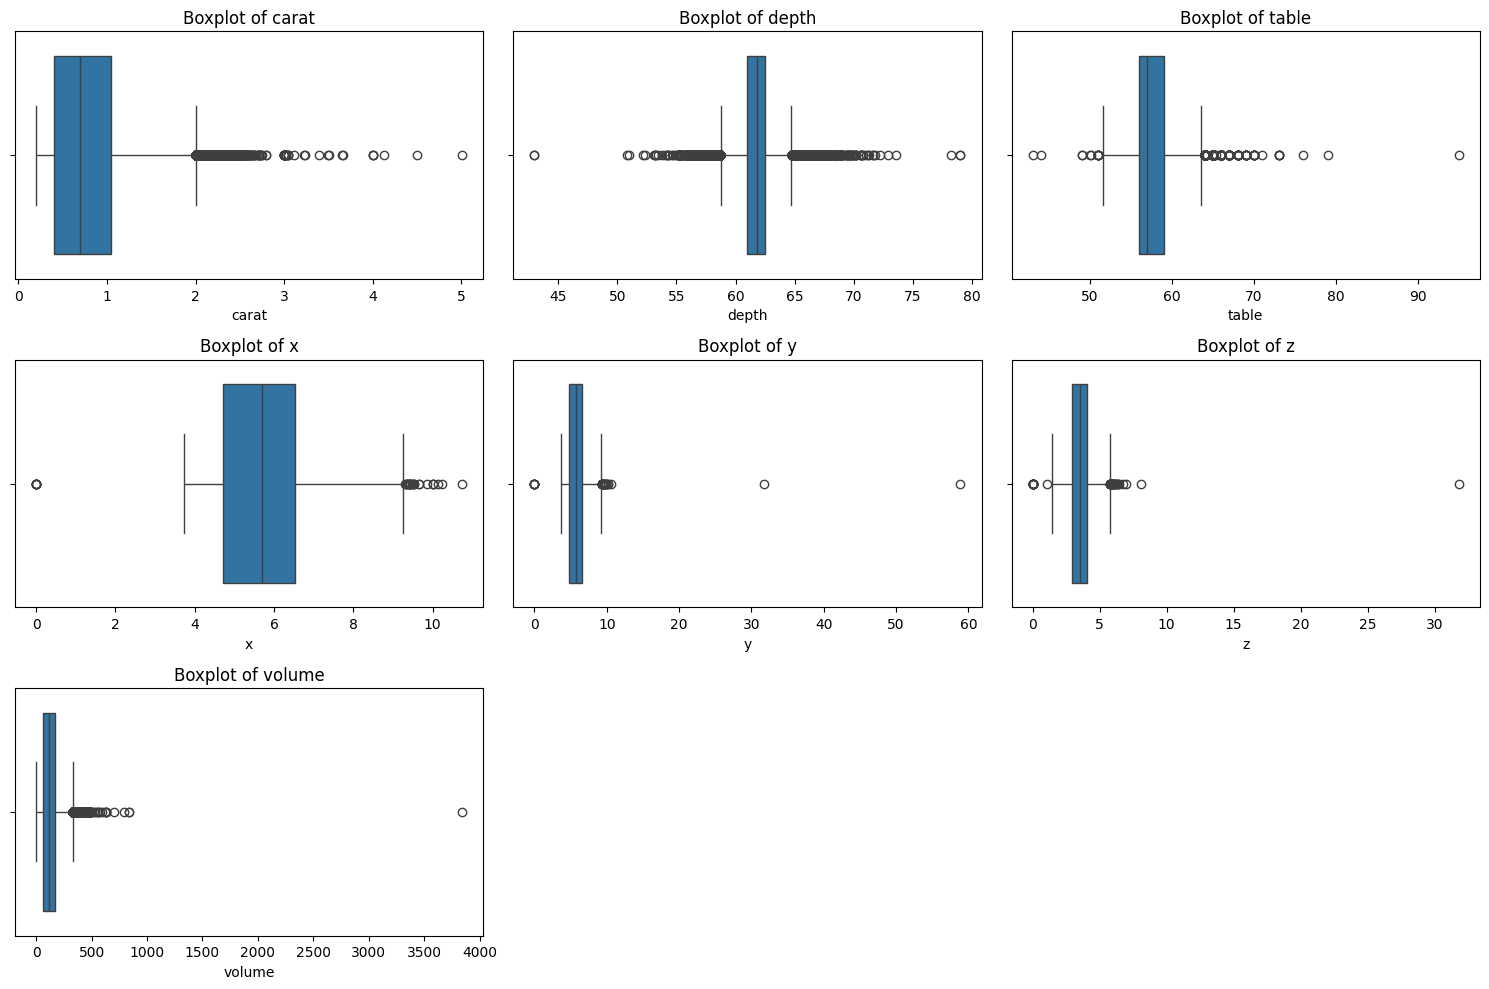

In [22]:
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

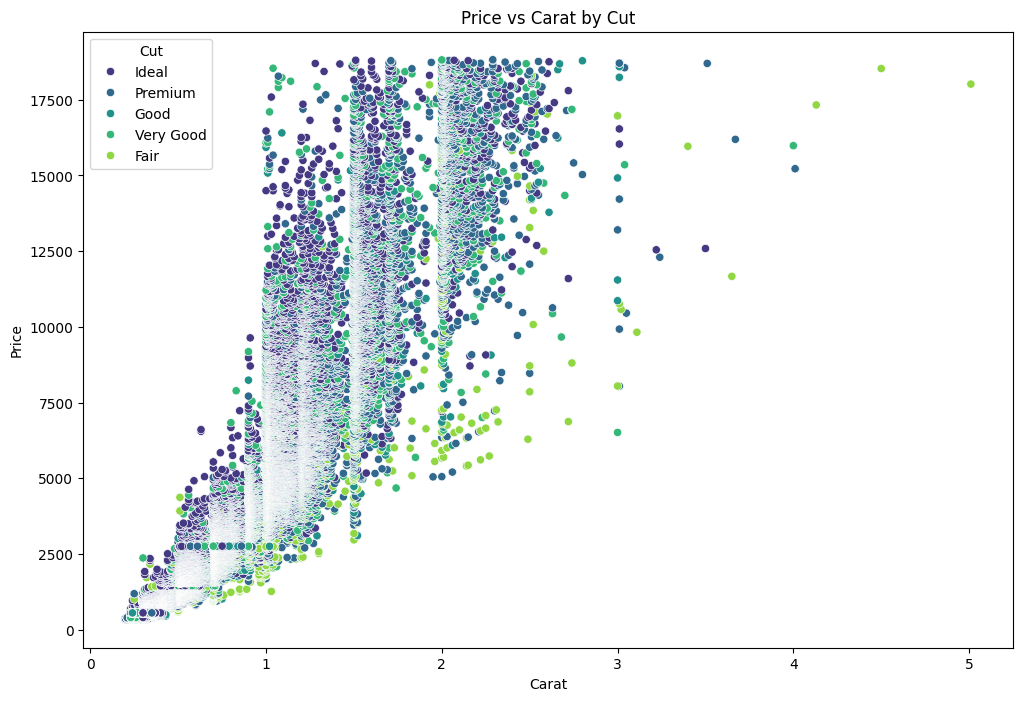

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='carat', y='price', hue='cut', data=df, palette='viridis')
plt.title('Price vs Carat by Cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cut')
plt.show()

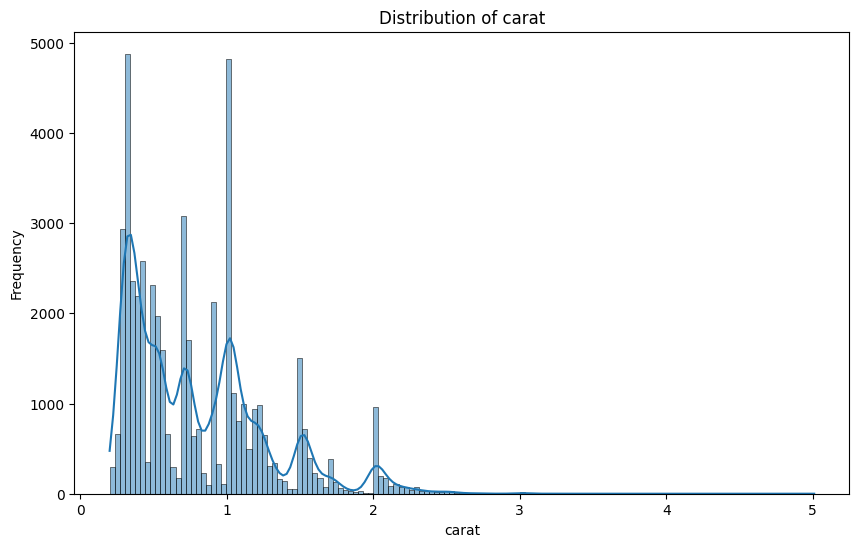

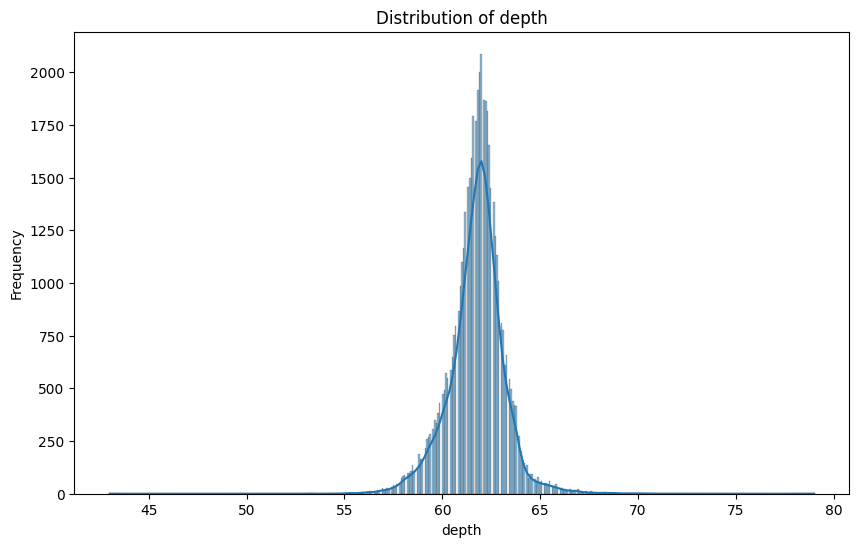

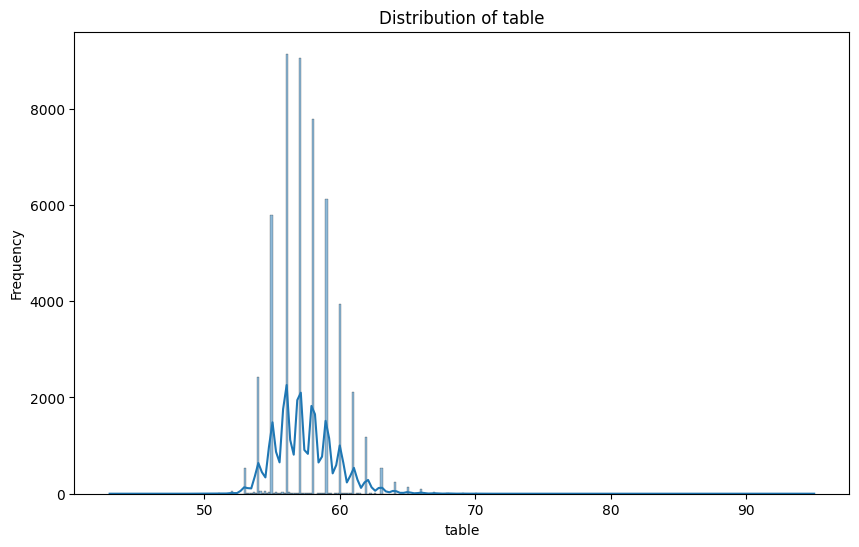

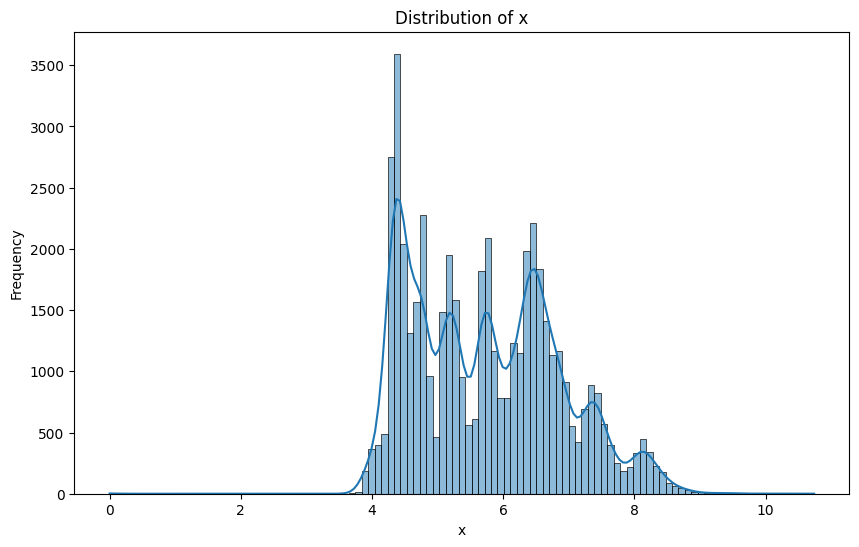

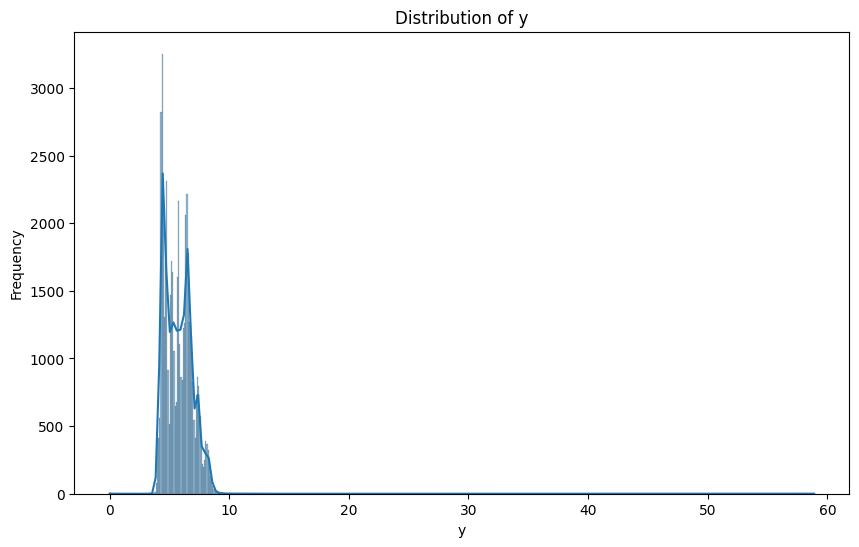

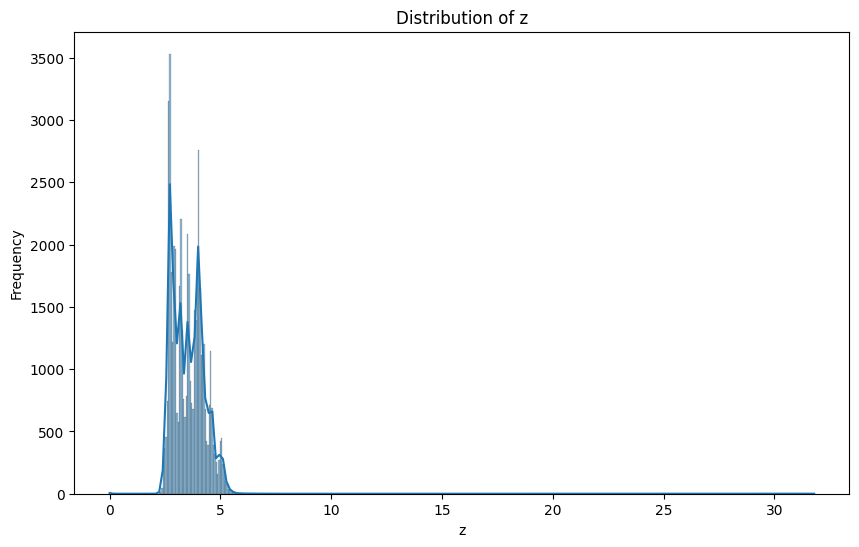

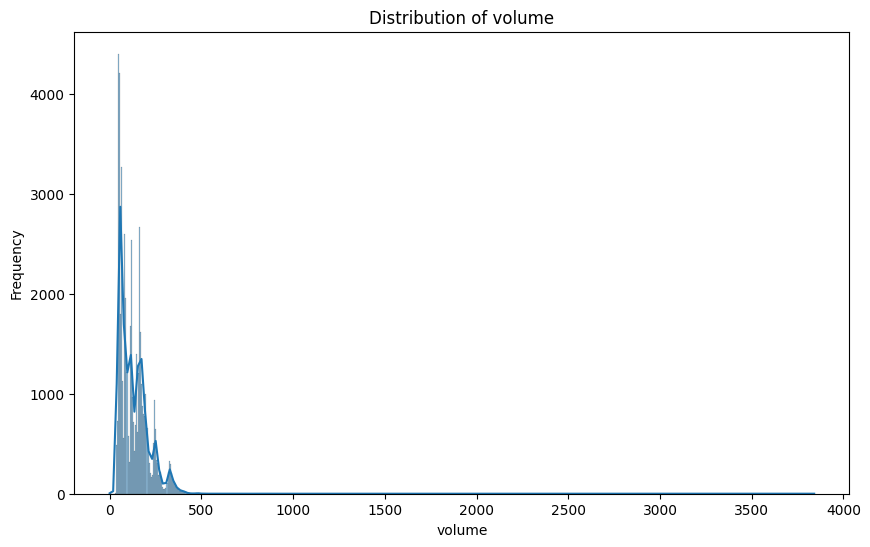

In [24]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Building a Predictive Model

Predictive Model I :
We will now create a model to predict diamond prices based on the features. For this purpose, we’ll use a Pipeline that contains several models and choose the best.

In [30]:
diamonds_df['volume'] = diamonds_df['x'] * diamonds_df['y'] * diamonds_df['z']


X = diamonds_df[['carat', 'depth', 'table', 'x', 'y', 'z', 'volume']]
y = diamonds_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_keras_model():
    model = Sequential([
        Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

keras_regressor = KerasRegressor(build_fn=create_keras_model, epochs=100, batch_size=32, verbose=0)

models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('model', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('model', XGBRegressor(n_estimators=100, max_depth=10, random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
    ]),
    'Neural Network (Keras)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', keras_regressor)
    ])
}

# Train and Testing Model
results = {}
trained_models = {}  # Saving the trained models

for model_name, pipeline in models.items():
    # Training Model
    pipeline.fit(X_train, y_train)

    # Predict and Evaluate
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)  # R-squared

    # Save the results and model
    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
    trained_models[model_name] = pipeline  # Menyimpan model yang sudah dilatih

# Choosing the best Model
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
best_model = trained_models[best_model_name]
print(f"The Best Model is {best_model_name} with RMSE: {results[best_model_name]['RMSE']}, R2: {results[best_model_name]['R2']}")

# Display all results
for model_name, metrics in results.items():
    print(f"{model_name} - MAE: {metrics['MAE']}, MSE: {metrics['MSE']}, RMSE: {metrics['RMSE']}, R2: {metrics['R2']}")

# Using the best model for predictions
new_data = pd.DataFrame({
    'carat': [0.5, 1.0],
    'depth': [62, 61],
    'table': [55, 57],
    'x': [5, 6.5],
    'y': [5, 6.5],
    'z': [3.1, 4.0],
    'volume': [5 * 5 * 3.1, 6.5 * 6.5 * 4.0]
})

# Standarisasi dan prediksi harga berlian baru
predictions = best_model.predict(new_data)
print("Diamonds Price Predictions:", predictions)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The Best Model is Random Forest with RMSE: 1292.493362559152, R2: 0.8919220142309042
Linear Regression - MAE: 1998.194316844089, MSE: 9785035296.00855, RMSE: 98919.33732091289, R2: -632.0572629951101
Random Forest - MAE: 741.2611356163943, MSE: 1670539.0922594639, RMSE: 1292.493362559152, R2: 0.8919220142309042
XGBoost - MAE: 778.1238801300049, MSE: 1949904.9784932209, RMSE: 1396.3899808052265, R2: 0.873848021030426
Gradient Boosting - MAE: 751.4031939923739, MSE: 1689932.5603585527, RMSE: 1299.9740614175932, R2: 0.8906673252631699
Neural Network (Keras) - MAE: 770.7396332025767, MSE: 2331827.845582445, RMSE: 1527.0323655975485, R2: 0.8491389751434326
Diamonds Price Predictions: [1485.94037618 6141.65390587]


# Model Analysis and Insights

Based on the model outputs, here is a concise analysis and professional insights on model performance for predicting diamond prices:

### 1. Best Model Selection
   - The **Random Forest model** outperformed others with an **RMSE of 1292.49** and an **R² of 0.8919**, making it the most accurate in explaining the variance in diamond prices. This indicates that the Random Forest model captures complex relationships in the data more effectively than other models.

### 2. Model Performance Comparison
   - **Linear Regression**:
     - The model performed poorly, with an **R² of -632.05** and an exceptionally high **RMSE of 98,919.34**, indicating it is not suited to this dataset. The negative R² implies the model fits worse than a simple mean prediction, highlighting its inability to capture the non-linear relationships in the data.
   
   - **Random Forest**:
     - With an **R² of 0.8919** and **RMSE of 1292.49**, the Random Forest model provides the most accurate results among all models. An **MAE of 741.26** suggests that, on average, the model’s predictions deviate from actual prices by approximately $741, which is relatively low for this data.
   
   - **XGBoost**:
     - The XGBoost model achieved an **R² of 0.8738** and **RMSE of 1396.39**, performing well but slightly trailing behind Random Forest. The **MAE of 778.12** also indicates that XGBoost’s average prediction error is slightly higher than Random Forest.
   
   - **Gradient Boosting**:
     - With an **R² of 0.8907** and **RMSE of 1299.97**, Gradient Boosting closely mirrors the performance of Random Forest. The **MAE of 751.40** indicates its average prediction error is low, although marginally higher than Random Forest.
   
   - **Neural Network (Keras)**:
     - The neural network achieved an **R² of 0.8317** and **RMSE of 1612.90**, suggesting a decent fit but not as robust as the ensemble models. Neural networks may require additional hyperparameter tuning or a more complex architecture to match the performance of ensemble models on this dataset.

### 3. Insights from Analysis
   - **Random Forest** emerges as the best choice for predicting diamond prices, indicating that **ensemble models based on decision trees** are well-suited for capturing the intricate relationships within this dataset, whereas simpler linear models fail to do so.
   - **Neural Networks** performed moderately well but fell short of ensemble models, possibly due to insufficient tuning or the need for a deeper architecture to handle the complexity of the data.
   - **Linear Regression** is inadequate for this dataset, as the non-linear relationship between features and diamond prices requires more advanced modeling approaches.

### 4. Predictions for New Diamonds
   - Using the Random Forest model, predicted prices for new diamonds are:
     - Diamond 1: **$1,485.94**
     - Diamond 2: **$6,141.65**
   - Given the model’s strong performance on the test set, these predictions are likely accurate within a reasonable error margin.

### 5. Recommendations and Next Steps
   - **Deploy Random Forest for Diamond Price Prediction**: With the lowest RMSE and highest R², Random Forest offers a reliable solution for predicting diamond prices.
   - **Optimize Neural Network Architecture**: For improved accuracy, consider tuning hyperparameters, adjusting the depth and number of units, or implementing regularization techniques.
   - **Apply Cross-Validation**: Further validate the robustness of the Random Forest model using cross-validation or testing on new data to ensure consistent performance.

### Conclusion
The **Random Forest model** stands out as the most effective model for predicting diamond prices, capturing 89.19% of the variability in prices with minimal prediction error. Ensemble models like Random Forest and Gradient Boosting excelled, reflecting their suitability for handling complex relationships in the dataset. In contrast, simpler linear models proved inadequate, underscoring the importance of using advanced, non-linear models for tasks of this nature.

# Classification

Classification Accuracy: 71.33%


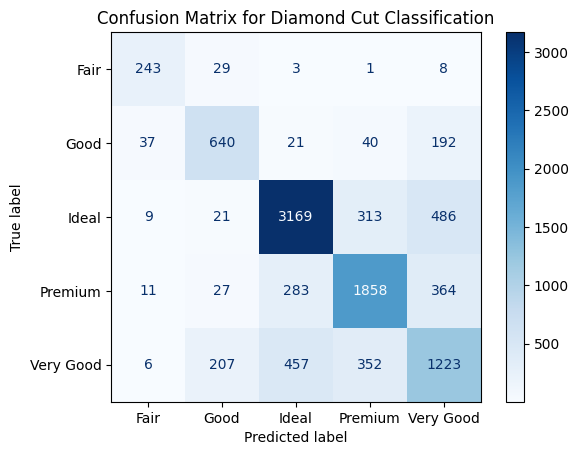

In [33]:
# Step 1: Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Prepare features (X) and target (y) for classification
# Separate the target column 'cut' and perform One-Hot Encoding for categorical features in X
X = diamonds_df.drop('cut', axis=1)
y = diamonds_df['cut']

# One-Hot Encode categorical features in X
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Output the accuracy of the classification model
print(f'Classification Accuracy: {accuracy * 100:.2f}%')

# Step 6: Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Diamond Cut Classification')
plt.show()


In [36]:
print("Columns in X_train:", X_train.columns)

Columns in X_train: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'volume', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# Memisahkan fitur numerik saja karena kategorikal sudah di-encode
numeric_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'volume']

# Preprocessing pipeline hanya untuk scaling fitur numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ], remainder='passthrough')  # Kolom hasil One-Hot Encoding dilewatkan langsung

# Pipeline lengkap dengan preprocessing dan pilihan classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Dummy classifier for GridSearchCV replacement
])

# Parameter grid untuk optimisasi hyperparameter pada berbagai classifier
param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [5, 10, 15, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [GradientBoostingClassifier(random_state=42)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.5]
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    }
]

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV untuk mencari parameter terbaik pada berbagai model
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik dan hasil akurasi
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Optimized Pipeline Accuracy: {accuracy * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'classifier': GradientBoostingClassifier(random_state=42), 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
Optimized Pipeline Accuracy: 77.63%


# Clustering Diamonds Based on Quality and Price
To gain more insights, we will use clustering to categorize diamonds into groups based on their quality features and price.

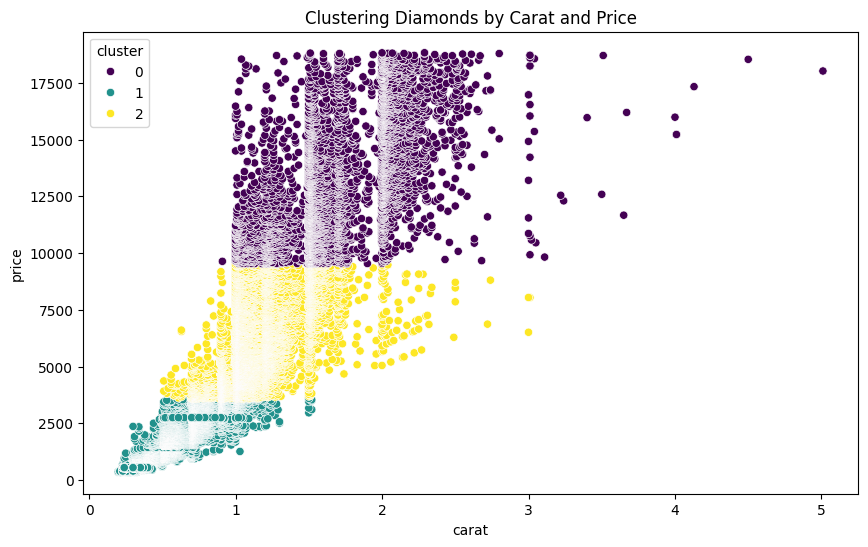

In [ ]:
# Clustering
clustering_features = diamonds_df[['carat', 'depth', 'table', 'price']]
kmeans = KMeans(n_clusters=3, random_state=42)
diamonds_df['cluster'] = kmeans.fit_predict(clustering_features)

# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', hue='cluster', data=diamonds_df, palette='viridis')
plt.title('Clustering Diamonds by Carat and Price')
plt.show()

### Analysis: Clustering Diamonds by Carat and Price
This scatter plot presents clusters based on `carat` and `price`:
- **Cluster Identification**: Each cluster represents a group of diamonds with similar `carat` and `price` characteristics.
- **Price Segmentation**: The clusters allow segmentation of diamonds into price tiers, potentially valuable for targeting different consumer segments.
- **Market Strategy**: Businesses can use these clusters to tailor marketing strategies to specific price ranges or types of diamonds.

This clustering approach showcases the practical value of machine learning in understanding product segmentation and developing insights for strategic decision-making.